<a href="https://colab.research.google.com/github/yadavaditya13/object_detection_image_using_opencv_deep_learning/blob/master/object_detection_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
import argparse

In [0]:
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True, help="path to the input image:")
ap.add_argument("-p", "--prototxt", required=True, help="path to Caffe 'deploy' prototxt file")
ap.add_argument("-m", "--model", required=True, help="path to Caffe pretrained model:")
ap.add_argument("-c", "--confidence", type=float, default=0.2, help="minimum probability to filter weak detection")
args = vars(ap.parse_args())

#google-colab gave error for argument parsing so had to give inputs hardcoded:

#args = {}
#args["image"] = "images/example_05.jpg"
#args["confidence"] = 0.2
#args["prototxt"] = "MobileNetSSD_deploy.prototxt.txt"
#args["model"] = "MobileNetSSD_deploy.caffemodel"

In [0]:
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"]
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

In [27]:
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(args["prototxt"], args["model"])

image = cv2.imread(args["image"])
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)

[INFO] loading model...


In [28]:
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections...


In [29]:
for i in np.arange(0, detections.shape[2]):
  confidence = detections[0, 0, i, 2]
  if confidence > args["confidence"]:
    idx = int(detections[0, 0, i, 1])
    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype("int")

    label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
    print("[INFO] {}".format(label))
    cv2.rectangle(image, (startX, startY), (endX, endY), COLORS[idx], 2)
    y = startY - 15 if startY - 15 > 15 else startY + 15
    cv2.putText(image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)

[INFO] car: 99.43%
[INFO] cat: 57.60%
[INFO] dog: 61.78%
[INFO] horse: 99.91%
[INFO] person: 88.44%


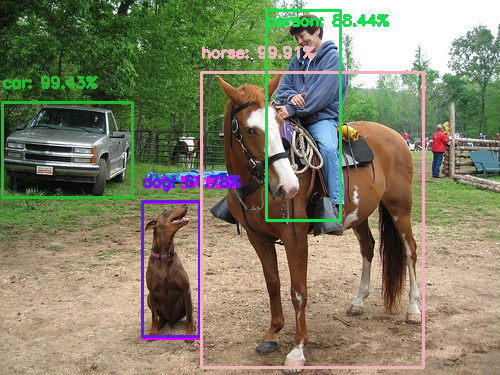

-1

In [30]:
#from google.colab.patches import cv2_imshow
cv2.imshow(image)
cv2.waitKey(0)